# Xarxa neuronal

In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold
from scipy.stats import uniform as sp_rand
from scipy.stats import randint
from time import time
from sklearn import preprocessing

Using TensorFlow backend.


## Consum diari total multivariate multi-step

In [2]:
daily=pd.read_csv('C:/Users/Laura/Desktop/Smart meters London/workspace R/Dades netes/Final/daily_agr_mitjanaLlarPerDia_tot.csv')
daily.head(5)

,date,apparentTemperatureMax,apparentTemperatureMin,sunsetTimeHour,weekday,season,cloudCover,humidity,visibility,month,dewPoint,pressure,energy_sum
0,2014-02-08,5.67,2.19,17,6,winter,0.47,0.77,11.20,2,3.99,979.25,11.569300
1,2013-12-24,11.93,2.68,15,2,winter,0.40,0.81,10.86,12,5.42,979.52,11.981672
2,2012-11-01,11.46,0.85,16,4,autumn,0.44,0.85,12.54,11,5.06,979.63,10.781689
3,2014-02-05,5.86,1.03,16,3,winter,0.73,0.77,10.91,2,4.06,982.20,11.415105
4,2012-04-17,10.01,2.76,19,2,spring,0.60,0.87,11.86,4,5.74,982.22,10.617443


In [3]:
#Ens quedem amb date i energy_sum, ordenem valors per data i resetejem index
daily_dia=daily[['date','energy_sum','apparentTemperatureMax','apparentTemperatureMin','humidity']].sort_values(by=['date']).reset_index()
daily_dia.head(5)


,index,date,energy_sum,apparentTemperatureMax,apparentTemperatureMin,humidity
0,735,2011-11-23,6.952692,10.36,2.18,0.93
1,736,2011-11-24,8.536480,12.93,7.01,0.89
2,682,2011-11-25,9.499781,13.03,4.84,0.79
3,713,2011-11-26,10.267707,12.96,4.69,0.81
4,609,2011-11-27,10.850805,13.54,2.94,0.72


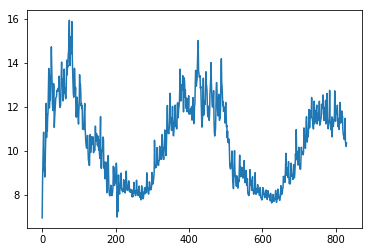

In [18]:
plt.plot(daily_dia.energy_sum )

In [4]:

daily_dia['y+1']=daily_dia['energy_sum'].shift(-1)
daily_dia['y+2']=daily_dia['energy_sum'].shift(-2)
daily_dia['y+3']=daily_dia['energy_sum'].shift(-3)
daily_dia['y+4']=daily_dia['energy_sum'].shift(-4)
daily_dia['y+5']=daily_dia['energy_sum'].shift(-5)
daily_dia['y+6']=daily_dia['energy_sum'].shift(-6)



daily_dia['t-1']=daily_dia['energy_sum'].shift(1)
daily_dia['t-2']=daily_dia['energy_sum'].shift(2)
daily_dia['t-3']=daily_dia['energy_sum'].shift(3)
daily_dia['t-4']=daily_dia['energy_sum'].shift(4)
daily_dia['t-5']=daily_dia['energy_sum'].shift(5)
daily_dia['t-6']=daily_dia['energy_sum'].shift(6)
daily_dia['t-7']=daily_dia['energy_sum'].shift(7)
daily_dia['t-8']=daily_dia['energy_sum'].shift(8)
daily_dia['t-9']=daily_dia['energy_sum'].shift(9)
daily_dia['t-10']=daily_dia['energy_sum'].shift(10)
daily_dia['t-11']=daily_dia['energy_sum'].shift(11)
daily_dia['t-12']=daily_dia['energy_sum'].shift(12)
daily_dia['t-13']=daily_dia['energy_sum'].shift(13)
daily_dia['t-14']=daily_dia['energy_sum'].shift(14)

daily_dia['temp(t-1)']=daily_dia['apparentTemperatureMax'].shift(1)
daily_dia['temp(t-2)']=daily_dia['apparentTemperatureMax'].shift(2)
daily_dia['temp(t-3)']=daily_dia['apparentTemperatureMax'].shift(3)
daily_dia['temp(t-4)']=daily_dia['apparentTemperatureMax'].shift(4)
daily_dia['temp(t-5)']=daily_dia['apparentTemperatureMax'].shift(5)
daily_dia['temp(t-6)']=daily_dia['apparentTemperatureMax'].shift(6)
daily_dia['temp(t-7)']=daily_dia['apparentTemperatureMax'].shift(7)
daily_dia['temp(t-8)']=daily_dia['apparentTemperatureMax'].shift(8)
daily_dia['temp(t-9)']=daily_dia['apparentTemperatureMax'].shift(9)
daily_dia['temp(t-10)']=daily_dia['apparentTemperatureMax'].shift(10)
daily_dia['temp(t-11)']=daily_dia['apparentTemperatureMax'].shift(11)
daily_dia['temp(t-12)']=daily_dia['apparentTemperatureMax'].shift(12)
daily_dia['temp(t-13)']=daily_dia['apparentTemperatureMax'].shift(13)
daily_dia['temp(t-14)']=daily_dia['apparentTemperatureMax'].shift(14)

daily_dia['tempmin(t-1)']=daily_dia['apparentTemperatureMin'].shift(1)
daily_dia['tempmin(t-2)']=daily_dia['apparentTemperatureMin'].shift(2)
daily_dia['tempmin(t-3)']=daily_dia['apparentTemperatureMin'].shift(3)
daily_dia['tempmin(t-4)']=daily_dia['apparentTemperatureMin'].shift(4)
daily_dia['tempmin(t-5)']=daily_dia['apparentTemperatureMin'].shift(5)
daily_dia['tempmin(t-6)']=daily_dia['apparentTemperatureMin'].shift(6)
daily_dia['tempmin(t-7)']=daily_dia['apparentTemperatureMin'].shift(7)
daily_dia['tempmin(t-8)']=daily_dia['apparentTemperatureMin'].shift(8)
daily_dia['tempmin(t-9)']=daily_dia['apparentTemperatureMin'].shift(9)
daily_dia['tempmin(t-10)']=daily_dia['apparentTemperatureMin'].shift(10)
daily_dia['tempmin(t-11)']=daily_dia['apparentTemperatureMin'].shift(11)
daily_dia['tempmin(t-12)']=daily_dia['apparentTemperatureMin'].shift(12)
daily_dia['tempmin(t-13)']=daily_dia['apparentTemperatureMin'].shift(13)
daily_dia['tempmin(t-14)']=daily_dia['apparentTemperatureMin'].shift(14)

daily_dia['humidity(t-1)']=daily_dia['humidity'].shift(1)
daily_dia['humidity(t-2)']=daily_dia['humidity'].shift(2)
daily_dia['humidity(t-3)']=daily_dia['humidity'].shift(3)
daily_dia['humidity(t-4)']=daily_dia['humidity'].shift(4)
daily_dia['humidity(t-5)']=daily_dia['humidity'].shift(5)
daily_dia['humidity(t-6)']=daily_dia['humidity'].shift(6)
daily_dia['humidity(t-7)']=daily_dia['humidity'].shift(7)
daily_dia['humidity(t-8)']=daily_dia['humidity'].shift(8)
daily_dia['humidity(t-9)']=daily_dia['humidity'].shift(9)
daily_dia['humidity(t-10)']=daily_dia['humidity'].shift(10)
daily_dia['humidity(t-11)']=daily_dia['humidity'].shift(11)
daily_dia['humidity(t-12)']=daily_dia['humidity'].shift(12)
daily_dia['humidity(t-13)']=daily_dia['humidity'].shift(13)
daily_dia['humidity(t-14)']=daily_dia['humidity'].shift(14)

daily_dia

,index,date,energy_sum,apparentTemperatureMax,apparentTemperatureMin,humidity,y+1,y+2,y+3,y+4,...,humidity(t-5),humidity(t-6),humidity(t-7),humidity(t-8),humidity(t-9),humidity(t-10),humidity(t-11),humidity(t-12),humidity(t-13),humidity(t-14)
0,735,2011-11-23,6.952692,10.36,2.18,0.93,8.536480,9.499781,10.267707,10.850805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,736,2011-11-24,8.536480,12.93,7.01,0.89,9.499781,10.267707,10.850805,9.103382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,682,2011-11-25,9.499781,13.03,4.84,0.79,10.267707,10.850805,9.103382,9.274873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,713,2011-11-26,10.267707,12.96,4.69,0.81,10.850805,9.103382,9.274873,8.813513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,609,2011-11-27,10.850805,13.54,2.94,0.72,9.103382,9.274873,8.813513,9.227707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,641,2011-11-28,9.103382,12.58,1.31,0.86,9.274873,8.813513,9.227707,10.145910,...,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,265,2011-11-29,9.274873,13.47,3.39,0.82,8.813513,9.227707,10.145910,10.780273,...,0.89,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,571,2011-11-30,8.813513,11.87,3.34,0.78,9.227707,10.145910,10.780273,12.163127,...,0.79,0.89,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,199,2011-12-01,9.227707,12.15,5.29,0.82,10.145910,10.780273,12.163127,10.609714,...,0.81,0.79,0.89,0.93,NaN,NaN,NaN,NaN,NaN,NaN
9,338,2011-12-02,10.145910,5.33,0.46,0.87,10.780273,12.163127,10.609714,11.673417,...,0.72,0.81,0.79,0.89,0.93,NaN,NaN,NaN,NaN,NaN


In [5]:
#Ens quedem amb energies i temperatures 
#No agafem apparent temperature max ja que quan fem la predicció representa que no ho sabem
daily_dia=daily_dia.drop(['index','date','apparentTemperatureMax','apparentTemperatureMin', 'humidity'], axis=1)
daily_dia.head(5)


,energy_sum,y+1,y+2,y+3,y+4,y+5,y+6,t-1,t-2,t-3,...,humidity(t-5),humidity(t-6),humidity(t-7),humidity(t-8),humidity(t-9),humidity(t-10),humidity(t-11),humidity(t-12),humidity(t-13),humidity(t-14)
0,6.952692,8.536480,9.499781,10.267707,10.850805,9.103382,9.274873,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.536480,9.499781,10.267707,10.850805,9.103382,9.274873,8.813513,6.952692,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.499781,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,8.536480,6.952692,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,9.499781,8.536480,6.952692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,10.780273,10.267707,9.499781,8.536480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Eliminem les 14 primeres files ja que contenen NaN (valors buits)

daily_dia=daily_dia.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
daily_dia.head(5)

,energy_sum,y+1,y+2,y+3,y+4,y+5,y+6,t-1,t-2,t-3,...,humidity(t-5),humidity(t-6),humidity(t-7),humidity(t-8),humidity(t-9),humidity(t-10),humidity(t-11),humidity(t-12),humidity(t-13),humidity(t-14)
14,10.889362,11.525150,11.759837,12.633801,13.749174,11.951958,11.957446,11.673417,10.609714,12.163127,...,0.87,0.82,0.78,0.82,0.86,0.72,0.81,0.79,0.89,0.93
15,11.525150,11.759837,12.633801,13.749174,11.951958,11.957446,12.392776,10.889362,11.673417,10.609714,...,0.79,0.87,0.82,0.78,0.82,0.86,0.72,0.81,0.79,0.89
16,11.759837,12.633801,13.749174,11.951958,11.957446,12.392776,12.307079,11.525150,10.889362,11.673417,...,0.82,0.79,0.87,0.82,0.78,0.82,0.86,0.72,0.81,0.79
17,12.633801,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,11.759837,11.525150,10.889362,...,0.77,0.82,0.79,0.87,0.82,0.78,0.82,0.86,0.72,0.81
18,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,13.511968,12.633801,11.759837,11.525150,...,0.83,0.77,0.82,0.79,0.87,0.82,0.78,0.82,0.86,0.72


In [7]:
daily_dia=daily_dia.drop([829,828,827,826,825,824,823])
daily_dia.tail(5)

,energy_sum,y+1,y+2,y+3,y+4,y+5,y+6,t-1,t-2,t-3,...,humidity(t-5),humidity(t-6),humidity(t-7),humidity(t-8),humidity(t-9),humidity(t-10),humidity(t-11),humidity(t-12),humidity(t-13),humidity(t-14)
818,11.582159,10.979566,10.781898,10.674624,10.573835,10.518126,10.776242,11.490470,11.816914,11.285737,...,0.76,0.84,0.66,0.77,0.79,0.82,0.77,0.75,0.79,0.72
819,10.979566,10.781898,10.674624,10.573835,10.518126,10.776242,11.480411,11.582159,11.490470,11.816914,...,0.75,0.76,0.84,0.66,0.77,0.79,0.82,0.77,0.75,0.79
820,10.781898,10.674624,10.573835,10.518126,10.776242,11.480411,10.411403,10.979566,11.582159,11.490470,...,0.68,0.75,0.76,0.84,0.66,0.77,0.79,0.82,0.77,0.75
821,10.674624,10.573835,10.518126,10.776242,11.480411,10.411403,10.294997,10.781898,10.979566,11.582159,...,0.81,0.68,0.75,0.76,0.84,0.66,0.77,0.79,0.82,0.77
822,10.573835,10.518126,10.776242,11.480411,10.411403,10.294997,10.202945,10.674624,10.781898,10.979566,...,0.69,0.81,0.68,0.75,0.76,0.84,0.66,0.77,0.79,0.82


In [9]:
len(daily_dia)


809

In [8]:

#normalitzem
scaler=preprocessing.MinMaxScaler(feature_range=(0, 1))
daily_dia_norm=scaler.fit_transform(daily_dia)



In [9]:


#Seleccionem dades per test i train
y_daily=daily_dia_norm[:,0:7]
X_daily=daily_dia_norm[:,7:63]

#y_daily=daily_dia['energy_sum']
#X_daily=daily_dia.drop(['energy_sum'], axis='columns')



#Reshape de [samples,timesteps] a [samples,timesteps,features]

#Enlloc de 14 features en son 7 de una feature i 7 duna altre
X_daily=np.reshape(X_daily, (X_daily.shape[0], 14,4))



In [10]:

# definim model
import tensorflow as tf
model =Sequential()
model.add(LSTM(50, activation='relu', input_shape=(14, 4)))
model.add(Dense(7))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [11]:

import math
from sklearn.metrics import mean_squared_error

#Walk forward per test i train
minim=100
n_train=465
lenght=len(daily_dia)

llista_evaluate=list()
llista_prediccions=list()
llista_preditrain=list()
llista_scores=list()
llista_scoretrain=list()
sumScores=0

for i in range(n_train,lenght):
    #minim=minim+1
    X_train,X_test= X_daily[minim:i],X_daily[i:i+1]
    y_train,y_test= y_daily[minim:i],y_daily[i:i+1]

    #fem fit al model
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #mostrem score per cada model
    score=model.evaluate(X_test,y_test,verbose=0)
    llista_evaluate.append(score)
    
    #Predim per cadascun
    preditest=model.predict(X_test)
    llista_prediccions.append(preditest)
    
    preditrain=model.predict(X_train)
    llista_preditrain.append(preditrain)
    
    trainScore = math.sqrt(mean_squared_error(y_train, preditrain))
    llista_scoretrain.append(trainScore )
    

    testScore = math.sqrt(mean_squared_error(y_test, preditest))
    llista_scores.append(testScore)
   
    sumScores=sumScores+testScore

Instructions for updating:
Use tf.cast instead.


In [12]:
#Dividim la suma de scores de test entre el nombre de prediccions per obtenir la mitjana
sumScores/(lenght-n_train)

0.06371830108876007

In [13]:
#Fem llista amb les prediccions
llista_p=list()
for i in range(len(llista_prediccions)):
    llista_p.append(llista_prediccions[i].tolist())
    
llista_p

[[[0.5258055329322815,
   0.519406259059906,
   0.5297161936759949,
   0.510295033454895,
   0.5210326313972473,
   0.4957515001296997,
   0.4901890456676483]],
 [[0.5976303219795227,
   0.5823440551757812,
   0.5609474778175354,
   0.5912073850631714,
   0.5679285526275635,
   0.5775328278541565,
   0.5742428302764893]],
 [[0.5982276797294617,
   0.5880916118621826,
   0.5780216455459595,
   0.5594954490661621,
   0.5744301676750183,
   0.5891443490982056,
   0.6029675602912903]],
 [[0.6008329391479492,
   0.6074173450469971,
   0.6165752410888672,
   0.6295974850654602,
   0.640521228313446,
   0.6323665976524353,
   0.6117366552352905]],
 [[0.585823118686676,
   0.6056796908378601,
   0.6088155508041382,
   0.6026233434677124,
   0.579425036907196,
   0.5441998243331909,
   0.5360280871391296]],
 [[0.603111207485199,
   0.6234928369522095,
   0.6341874003410339,
   0.6345135569572449,
   0.5790444612503052,
   0.5883135199546814,
   0.5698124766349792]],
 [[0.5711160898208618,
   0.

In [14]:
#Fem llista amb la predicció de només el dia següent
llista_p0=list()
for i in range(len(llista_p)):
    llista_p0.append(llista_p[i][0][0])
    
#Fem llista amb la predicció de 2 dies
llista_p1=list()
for i in range(len(llista_p)):
    llista_p1.append(llista_p[i][0][1])
    
llista_p2=list()
for i in range(len(llista_p)):
    llista_p2.append(llista_p[i][0][2])
    
llista_p3=list()
for i in range(len(llista_p)):
    llista_p3.append(llista_p[i][0][3])
    
llista_p4=list()
for i in range(len(llista_p)):
    llista_p4.append(llista_p[i][0][4])
    
llista_p5=list()
for i in range(len(llista_p)):
    llista_p5.append(llista_p[i][0][5])
    
llista_p6=list()
for i in range(len(llista_p)):
    llista_p6.append(llista_p[i][0][6])



In [15]:
score0=math.sqrt(mean_squared_error(y_daily[n_train:lenght,0], llista_p0))
print("Error predicció 1 dia següent: {}".format(score0))
score1=math.sqrt(mean_squared_error(y_daily[n_train:lenght,1], llista_p1))
print("Error predicció 2 dia següent: {}".format(score1))
score2=math.sqrt(mean_squared_error(y_daily[n_train:lenght,2], llista_p2))
print("Error predicció 3 dia següent: {}".format(score2))
score3=math.sqrt(mean_squared_error(y_daily[n_train:lenght,3], llista_p3))
print("Error predicció 4 dia següent: {}".format(score3))
score4=math.sqrt(mean_squared_error(y_daily[n_train:lenght,4], llista_p4))
print("Error predicció 5 dia següent: {}".format(score4))
score5=math.sqrt(mean_squared_error(y_daily[n_train:lenght,5], llista_p5))
print("Error predicció 6 dia següent: {}".format(score5))

score6=math.sqrt(mean_squared_error(y_daily[n_train:lenght,6], llista_p6))
print("Error predicció 7 dia següent: {}".format(score6))


Error predicció 1 dia següent: 0.06008873530580592
Error predicció 2 dia següent: 0.07327357748109317
Error predicció 3 dia següent: 0.07127651816786797
Error predicció 4 dia següent: 0.0749016743107488
Error predicció 5 dia següent: 0.07316006699906583
Error predicció 6 dia següent: 0.07164354700716427
Error predicció 7 dia següent: 0.07197292803048952


In [16]:

predis=list()

for i in range(len(llista_prediccions)):
    predi=llista_prediccions[i].tolist()
    predis.append(predi)

predis=np.reshape(predis, (len(llista_prediccions),7)  )

predis

array([[0.52580553, 0.51940626, 0.52971619, ..., 0.52103263, 0.4957515 ,
        0.49018905],
       [0.59763032, 0.58234406, 0.56094748, ..., 0.56792855, 0.57753283,
        0.57424283],
       [0.59822768, 0.58809161, 0.57802165, ..., 0.57443017, 0.58914435,
        0.60296756],
       ...,
       [0.49278459, 0.5606792 , 0.48864421, ..., 0.50845098, 0.47002429,
        0.48485994],
       [0.42434558, 0.40723372, 0.38051444, ..., 0.4003354 , 0.30350474,
        0.3221378 ],
       [0.4693214 , 0.5382309 , 0.51520002, ..., 0.47251296, 0.40379846,
        0.38679057]])

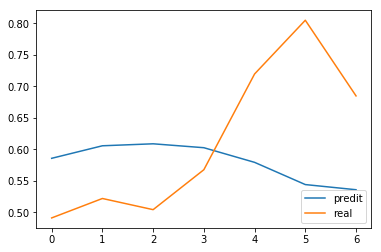

In [17]:
##Mostrem
plt.plot(predis[4], label="predit")
plt.plot(y_daily[n_train+4], label="real")
plt.legend(loc="lower right")
plt.show()

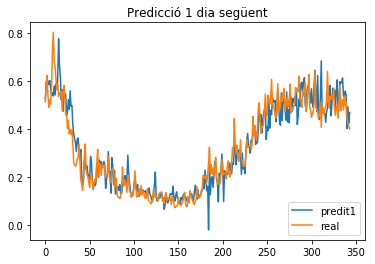

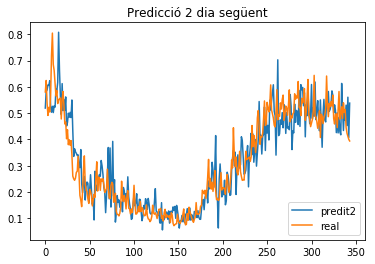

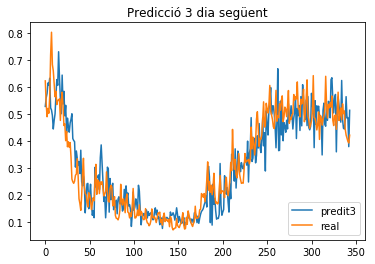

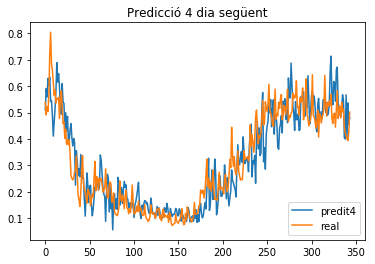

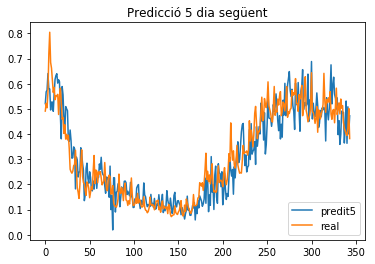

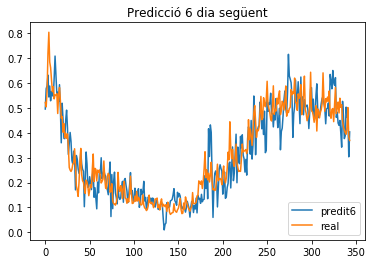

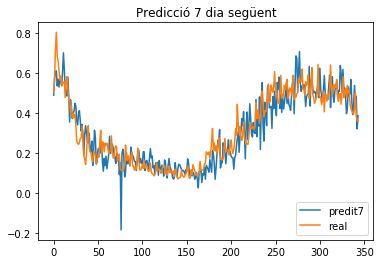

In [18]:
##Mostrem
plt.plot(llista_p0, label="predit1")
plt.plot(y_daily[n_train:lenght,0], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 1 dia següent")
plt.show()

plt.plot(llista_p1, label="predit2")
plt.plot(y_daily[n_train:lenght,1], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 2 dia següent")
plt.show()


plt.plot(llista_p2, label="predit3")
plt.plot(y_daily[n_train:lenght,2], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 3 dia següent")
plt.show()

plt.plot(llista_p3, label="predit4")
plt.plot(y_daily[n_train:lenght,3], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 4 dia següent")
plt.show()

plt.plot(llista_p4, label="predit5")
plt.plot(y_daily[n_train:lenght,4], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 5 dia següent")
plt.show()

plt.plot(llista_p5, label="predit6")
plt.plot(y_daily[n_train:lenght,5], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 6 dia següent")
plt.show()

plt.plot(llista_p6, label="predit7")
plt.plot(y_daily[n_train:lenght,6], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 7 dia següent")
plt.show()

In [19]:
llista_scores

[0.046988400192868644,
 0.05341635428692786,
 0.06643741290356496,
 0.11460049960402023,
 0.14018152343893395,
 0.12016386628074546,
 0.1577073425825601,
 0.15606421779665508,
 0.16011664618121194,
 0.16897920481845374,
 0.09882497545136033,
 0.11043746870191415,
 0.05417324045042562,
 0.07287510040091637,
 0.06056117553141249,
 0.1659687817110605,
 0.08494110796204421,
 0.060218859510585386,
 0.08913894675718884,
 0.08070006249037551,
 0.06473170172579111,
 0.06352827528073074,
 0.028085572581000643,
 0.09108890156259516,
 0.06646037466400664,
 0.08203194078106298,
 0.07212202348611815,
 0.07522119727308454,
 0.1344713320703536,
 0.13944677896187757,
 0.1456083925101714,
 0.10813215264088544,
 0.10500619810723713,
 0.09693352354068686,
 0.09068243773054308,
 0.08255150040101708,
 0.10517719538189221,
 0.07517669836158652,
 0.08217833247839164,
 0.08154957159543838,
 0.1371254127163265,
 0.04559811260707413,
 0.04676984129393863,
 0.05248748893193783,
 0.05034538440045647,
 0.062802443

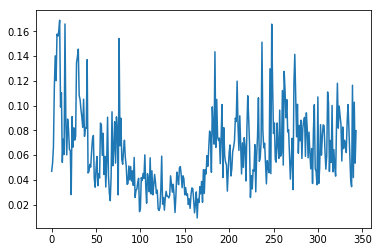

In [20]:
plt.plot(llista_scores)

In [21]:
#Creem un dataset amb format (nombre prediccions,17) per tornar les prediccions i els valors y als reals sense normalitzar
#El necessitem d'questa mida encara que només volguem passar 2 variables ja que al fer el minmax amb 17 variables
#per fer la inversa necessitem 17 variables
#Com que només en tenim 2, les ajuntem al dataset inicial i ens quedem amb 15 variables aleatories mes
#Obtenint un dataset amb 15 variables aleatories i les 2 variables que ens interessen (predi i y)


prova=daily_dia.iloc[n_train:lenght]
prova
#len(predis)
#lenght-n_train
#prova['predi']=predis
prova['predi1']=llista_p0
prova['predi2']=llista_p1
prova['predi3']=llista_p2
prova['predi4']=llista_p3
prova['predi5']=llista_p4
prova['predi6']=llista_p5
prova['predi7']=llista_p6

prova['y1']=y_daily[n_train:lenght,0]
prova['y2']=y_daily[n_train:lenght,1]
prova['y3']=y_daily[n_train:lenght,2]
prova['y4']=y_daily[n_train:lenght,3]
prova['y5']=y_daily[n_train:lenght,4]
prova['y6']=y_daily[n_train:lenght,5]
prova['y7']=y_daily[n_train:lenght,6]


prova=prova.drop(['energy_sum','t-1','t-2','t-3', 't-4', 't-5', 't-6', 't-7'], axis=1)
prova

prova=prova[['predi1','predi2','predi3','predi4','predi5','predi6','predi7','y1','y2','y3','y4','y5','y6','y7','t-8','t-9','t-10','t-11','t-12','t-13','t-14','temp(t-1)','temp(t-2)','temp(t-3)','temp(t-4)','temp(t-5)','temp(t-6)','temp(t-7)','temp(t-8)','temp(t-9)','temp(t-10)','temp(t-11)','temp(t-12)','temp(t-13)','temp(t-14)','tempmin(t-1)','tempmin(t-2)','tempmin(t-3)','tempmin(t-4)','tempmin(t-5)','tempmin(t-6)','tempmin(t-7)','tempmin(t-8)','tempmin(t-9)','tempmin(t-10)','tempmin(t-11)','tempmin(t-12)','tempmin(t-13)','tempmin(t-14)','humidity(t-1)','humidity(t-2)','humidity(t-3)','humidity(t-4)','humidity(t-5)','humidity(t-6)','humidity(t-7)','humidity(t-8)','humidity(t-9)','humidity(t-10)','humidity(t-11)','humidity(t-12)','humidity(t-13)','humidity(t-14)']]
prova

c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,predi1,predi2,predi3,predi4,predi5,predi6,predi7,y1,y2,y3,...,humidity(t-5),humidity(t-6),humidity(t-7),humidity(t-8),humidity(t-9),humidity(t-10),humidity(t-11),humidity(t-12),humidity(t-13),humidity(t-14)
479,0.525806,0.519406,0.529716,0.510295,0.521033,0.495752,0.490189,0.514061,0.580609,0.624326,...,0.82,0.90,0.96,0.93,0.72,0.74,0.78,0.80,0.72,0.78
480,0.597630,0.582344,0.560947,0.591207,0.567929,0.577533,0.574243,0.580609,0.624326,0.539280,...,0.73,0.82,0.90,0.96,0.93,0.72,0.74,0.78,0.80,0.72
481,0.598228,0.588092,0.578022,0.559495,0.574430,0.589144,0.602968,0.624326,0.539280,0.491355,...,0.63,0.73,0.82,0.90,0.96,0.93,0.72,0.74,0.78,0.80
482,0.600833,0.607417,0.616575,0.629597,0.640521,0.632367,0.611737,0.539280,0.491355,0.522145,...,0.73,0.63,0.73,0.82,0.90,0.96,0.93,0.72,0.74,0.78
483,0.585823,0.605680,0.608816,0.602623,0.579425,0.544200,0.536028,0.491355,0.522145,0.504442,...,0.67,0.73,0.63,0.73,0.82,0.90,0.96,0.93,0.72,0.74
484,0.603111,0.623493,0.634187,0.634514,0.579044,0.588314,0.569812,0.522145,0.504442,0.567725,...,0.81,0.67,0.73,0.63,0.73,0.82,0.90,0.96,0.93,0.72
485,0.571116,0.526069,0.524004,0.541807,0.495653,0.528956,0.530641,0.504442,0.567725,0.719460,...,0.85,0.81,0.67,0.73,0.63,0.73,0.82,0.90,0.96,0.93
486,0.544187,0.503543,0.516421,0.545803,0.527146,0.566271,0.583620,0.567725,0.719460,0.804631,...,0.88,0.85,0.81,0.67,0.73,0.63,0.73,0.82,0.90,0.96
487,0.550882,0.526140,0.495758,0.491412,0.527150,0.553682,0.558635,0.719460,0.804631,0.684716,...,0.91,0.88,0.85,0.81,0.67,0.73,0.63,0.73,0.82,0.90
488,0.538263,0.502203,0.445967,0.410844,0.490520,0.547044,0.538219,0.804631,0.684716,0.662177,...,0.83,0.91,0.88,0.85,0.81,0.67,0.73,0.63,0.73,0.82


In [22]:
# Convert predictions back to normal values

predi = scaler.inverse_transform(prova)
print(predi)
#0-6 predi
print(predi[0][0])
print(predi[0][1])
print(predi[0][2])
print(predi[0][3])
print(predi[0][4])
print(predi[0][5])
print(predi[0][6])

#7-13 y

print(predi[0][7])
print(predi[0][8])
print(predi[0][9])
print(predi[0][10])
print(predi[0][11])
print(predi[0][12])
print(predi[0][13])


[[11.69597397 11.63869745 11.73097623 ...  0.87        0.826
   0.859     ]
 [12.33883972 12.20202042 12.01051096 ...  0.859       0.87
   0.826     ]
 [12.34418635 12.25346376 12.16333281 ...  0.837       0.859
   0.87      ]
 ...
 [11.40042095 12.00810972 11.36336262 ...  0.881       0.8535
   0.8425    ]
 [10.78785955 10.63470026 10.39555017 ...  0.8645      0.881
   0.8535    ]
 [11.19041433 11.80718683 11.60104962 ...  0.8535      0.8645
   0.881     ]]
11.695973971765024
11.638697451497952
11.73097623042938
11.557147683753824
11.653254251222318
11.426976199009076
11.377189607266896
11.590859170709699
12.186486909458
12.5777825527296
11.816572589134799
11.3876267050719
11.6632140210701
11.5047561338867


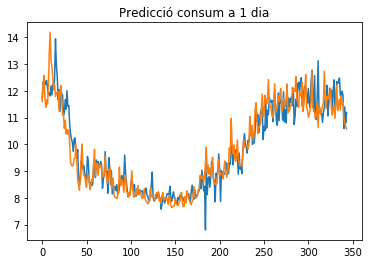

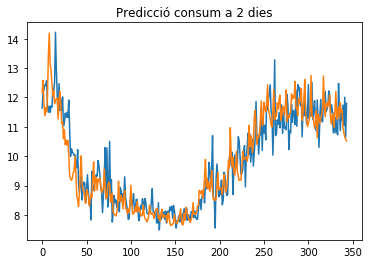

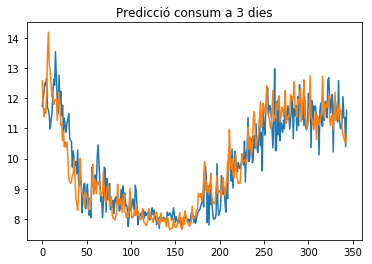

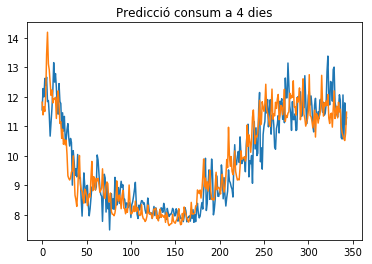

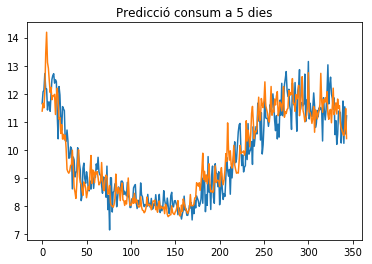

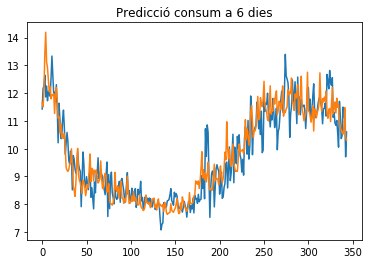

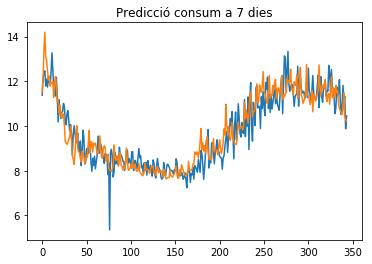

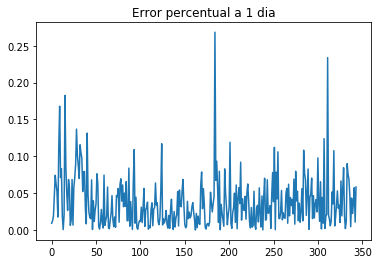

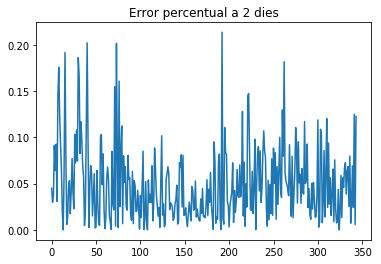

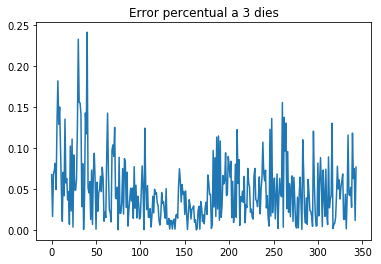

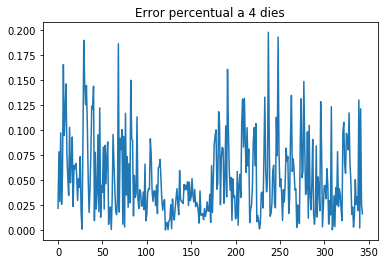

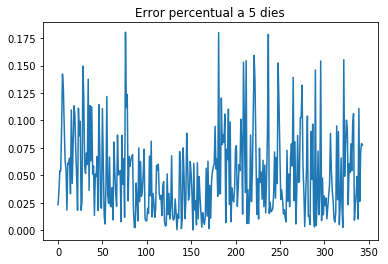

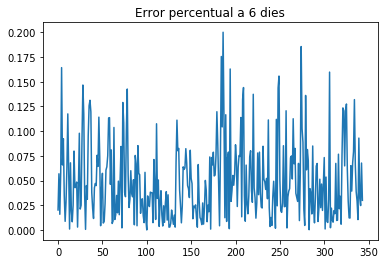

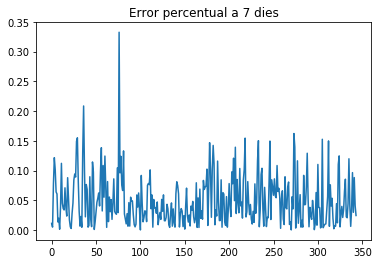

L'error mitjà a 1 dia és de 3.745392632777331 % 
L'error mitjà a 2 dies és de 4.930147418662605 % 
L'error mitjà a 3 dies és de 4.778695164991031 % 
L'error mitjà a 4 dies és de 5.178522813644043 % 
L'error mitjà a 5 dies és de 5.086857159731961 % 
L'error mitjà a 6 dies és de 4.968317886291285 % 
L'error mitjà a 7 dies és de 4.951264218245851 % 


In [23]:
llista1=list()
llista2=list()
llista3=list()
llista4=list()
llista5=list()
llista6=list()
llista7=list()
llista8=list()
llista9=list()
llista10=list()
llista11=list()
llista12=list()
llista13=list()
llista14=list()




llista_errors1=list()
llista_errorsabs1=list()
llista_errorsres1=list()


llista_errors2=list()
llista_errorsabs2=list()
llista_errorsres2=list()


llista_errors3=list()
llista_errorsabs3=list()
llista_errorsres3=list()

llista_errors4=list()
llista_errorsabs4=list()
llista_errorsres4=list()

llista_errors5=list()
llista_errorsabs5=list()
llista_errorsres5=list()

llista_errors6=list()
llista_errorsabs6=list()
llista_errorsres6=list()

llista_errors7=list()
llista_errorsabs7=list()
llista_errorsres7=list()


    
for i in range(len(predi)):
    
    llista1.append(predi[i][0])
    llista2.append(predi[i][1])
    llista3.append(predi[i][2])
    llista4.append(predi[i][3])
    llista5.append(predi[i][4])
    llista6.append(predi[i][5])
    llista7.append(predi[i][6])
    llista8.append(predi[i][7])
    llista9.append(predi[i][8])
    llista10.append(predi[i][9])
    llista11.append(predi[i][10])
    llista12.append(predi[i][11])
    llista13.append(predi[i][12])
    llista14.append(predi[i][13])
    
    valor1=predi[i][7] - predi[i][0]
    valorabs1=math.fabs(valor1)
    valorrespecte1=valorabs1/predi[i][7]
    llista_errors1.append(valor1)
    llista_errorsabs1.append(valorabs1)
    llista_errorsres1.append(valorrespecte1)
    
    valor2=predi[i][8] - predi[i][1]
    valorabs2=math.fabs(valor2)
    valorrespecte2=valorabs2/predi[i][8]
    llista_errors2.append(valor2)
    llista_errorsabs2.append(valorabs2)
    llista_errorsres2.append(valorrespecte2)
    
    valor3=predi[i][9] - predi[i][2]
    valorabs3=math.fabs(valor3)
    valorrespecte3=valorabs3/predi[i][9]
    llista_errors3.append(valor3)
    llista_errorsabs3.append(valorabs3)
    llista_errorsres3.append(valorrespecte3)
    
    valor4=predi[i][10] - predi[i][3]
    valorabs4=math.fabs(valor4)
    valorrespecte4=valorabs4/predi[i][10]
    llista_errors4.append(valor4)
    llista_errorsabs4.append(valorabs4)
    llista_errorsres4.append(valorrespecte4)
    
    valor5=predi[i][11] - predi[i][4]
    valorabs5=math.fabs(valor5)
    valorrespecte5=valorabs5/predi[i][11]
    llista_errors5.append(valor5)
    llista_errorsabs5.append(valorabs5)
    llista_errorsres5.append(valorrespecte5)
    
    valor6=predi[i][12] - predi[i][5]
    valorabs6=math.fabs(valor6)
    valorrespecte6=valorabs6/predi[i][12]
    llista_errors6.append(valor6)
    llista_errorsabs6.append(valorabs6)
    llista_errorsres6.append(valorrespecte6)
    
    valor7=predi[i][13] - predi[i][6]
    valorabs7=math.fabs(valor7)
    valorrespecte7=valorabs7/predi[i][13]
    llista_errors7.append(valor7)
    llista_errorsabs7.append(valorabs7)
    llista_errorsres7.append(valorrespecte7)
    
    
plt.plot(llista1)
plt.plot(llista8)
plt.title("Predicció consum a 1 dia")
plt.show()

plt.plot(llista2)
plt.plot(llista9)
plt.title("Predicció consum a 2 dies")
plt.show()

plt.plot(llista3)
plt.plot(llista10)
plt.title("Predicció consum a 3 dies")
plt.show()

plt.plot(llista4)
plt.plot(llista11)
plt.title("Predicció consum a 4 dies")
plt.show()

plt.plot(llista5)
plt.plot(llista12)
plt.title("Predicció consum a 5 dies")
plt.show()

plt.plot(llista6)
plt.plot(llista13)
plt.title("Predicció consum a 6 dies")
plt.show()

plt.plot(llista7)
plt.plot(llista14)
plt.title("Predicció consum a 7 dies")
plt.show()




plt.plot(llista_errorsres1)
plt.title("Error percentual a 1 dia")
plt.show()
plt.plot(llista_errorsres2)
plt.title("Error percentual a 2 dies")
plt.show()
plt.plot(llista_errorsres3)
plt.title("Error percentual a 3 dies")
plt.show()
plt.plot(llista_errorsres4)
plt.title("Error percentual a 4 dies")
plt.show()
plt.plot(llista_errorsres5)
plt.title("Error percentual a 5 dies")
plt.show()
plt.plot(llista_errorsres6)
plt.title("Error percentual a 6 dies")
plt.show()
plt.plot(llista_errorsres7)
plt.title("Error percentual a 7 dies")
plt.show()



error_mitja1=sum(llista_errorsres1)/(len(llista_errorsres1))*100
error_mitja2=sum(llista_errorsres2)/(len(llista_errorsres2))*100
error_mitja3=sum(llista_errorsres3)/(len(llista_errorsres3))*100
error_mitja4=sum(llista_errorsres4)/(len(llista_errorsres4))*100
error_mitja5=sum(llista_errorsres5)/(len(llista_errorsres5))*100
error_mitja6=sum(llista_errorsres6)/(len(llista_errorsres6))*100
error_mitja7=sum(llista_errorsres7)/(len(llista_errorsres7))*100


print("L'error mitjà a 1 dia és de {} % " .format(error_mitja1))
print("L'error mitjà a 2 dies és de {} % " .format(error_mitja2))
print("L'error mitjà a 3 dies és de {} % " .format(error_mitja3))
print("L'error mitjà a 4 dies és de {} % " .format(error_mitja4))
print("L'error mitjà a 5 dies és de {} % " .format(error_mitja5))
print("L'error mitjà a 6 dies és de {} % " .format(error_mitja6))
print("L'error mitjà a 7 dies és de {} % " .format(error_mitja7))

In [24]:
(error_mitja1+error_mitja2+error_mitja3+error_mitja4+error_mitja5+error_mitja6+error_mitja7)/7

4.80559961347773